In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.logging.print_header()

dandelion==0.0.27.post1 pandas==1.1.3 numpy==1.18.5 matplotlib==3.3.2 networkx==2.5 scipy==1.4.1 skbio==0.5.6


In [3]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [4]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [5]:
# Read in B cell data
%time bdata = sc.read_h5ad('h5ad/covid_jan_2021_bcells.h5ad')
bdata

CPU times: user 6.28 s, sys: 394 ms, total: 6.68 s
Wall time: 13.3 s


AnnData object with n_obs × n_vars = 74437 × 1051
    obs: 'Site', 'doublet', 'patient_id', 'sample_id', 'batch', 'Resample', 'Collection_Day', 'Sex', 'Age', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'leiden', 'consensus', 'initial_clustering', 'study_id', 'initial_clustering_B', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_B', 'celltype_B', 'celltype_B_v2', 'Status_on_day_collection_summary_v2', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'leiden_B2'
    var: 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'Status_on_day_collection_summary_v2_colors', 'bcr_QC

In [6]:
# subset to each severity  classification
from collections import defaultdict
adata = defaultdict(dict)
vdj = defaultdict(dict)

In [7]:
# subset each status and place it in adata
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    adata[x] = bdata[bdata.obs['Status_on_day_collection_summary_v2'] == x].copy()

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [8]:
vdj_files = {"Critical":'dandelion_output/covid_jan_2021_bcells_vdj_Critical.h5',
             "Severe":'dandelion_output/covid_jan_2021_bcells_vdj_Severe.h5',
             "Moderate":'dandelion_output/covid_jan_2021_bcells_vdj_Moderate.h5',
             "Mild":'dandelion_output/covid_jan_2021_bcells_vdj_Mild.h5',
             "Asymptomatic":'dandelion_output/covid_jan_2021_bcells_vdj_Asymptomatic.h5',
             "Healthy":'dandelion_output/covid_jan_2021_bcells_vdj_Healthy.h5'}

In [9]:
# also read in the vdj objects
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    vdj[x] = ddl.read_h5(vdj_files[x])

In [10]:
data = pd.DataFrame()
for x in vdj:
    data = data.append(vdj[x].metadata)

In [11]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [12]:
from dandelion.tools import extract_edge_weights
#  isotype_df = defaultdict(dict)

In [13]:
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    ddl.tl.transfer(adata[x], vdj[x])

converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots


In [23]:
import numpy as np
for x in adata:
    adata[x].obs['c_call_heavy'] = adata[x].obs['c_call_heavy'].replace(np.nan, 'No_BCR')
    adata[x].obs['c_call_heavy'] = adata[x].obs['c_call_heavy'].replace('', 'unassigned')
    adata[x].obs['isotype'] = adata[x].obs['isotype'].replace(np.nan, 'No_BCR')
    adata[x].obs['isotype'] = adata[x].obs['isotype'].replace('', 'unassigned')

In [24]:
ccalls = []
for x in adata:
    ccalls.append(list(set(x for x in adata[x].obs['c_call_heavy'] if pd.notnull(x) and x != '')))
ccalls = sorted(list(set(ddl.utl.flatten(ccalls))))
ccalls

['IGHA1',
 'IGHA1,IGHA2',
 'IGHA2',
 'IGHD',
 'IGHE',
 'IGHG1',
 'IGHG1,IGHG2',
 'IGHG1,IGHG2,IGHG3',
 'IGHG1,IGHG3',
 'IGHG1,IGHG3,IGHG4',
 'IGHG2',
 'IGHG2,IGHG4',
 'IGHG3',
 'IGHG3,IGHG4',
 'IGHG4',
 'IGHM',
 'No_BCR',
 'unassigned']

In [25]:
col_dict = {'unassigned':'#FFFFFF',
            'No_BCR':'#FFFFFF',
'IGHM':'#264653',
'IGHD':'#2A9D8F',
'IGHA1':'#F1CE63',
'IGHA2':'#F28E2B',
'IGHE':'#000000',
'IGHG1':'#fee5d9',
'IGHG2':'#fcae91',
'IGHG3':'#fb6a4a',
'IGHG4':'#cb181d',
'IGHA1,IGHA2':'#ffffff',
'IGHG1,IGHG2':'#ffffff',
'IGHG2,IGHG3':'#ffffff',
'IGHG1,IGHG3':'#ffffff',
'IGHG1,IGHG3,IGHG4':'#ffffff',
'IGHG1,IGHG2,IGHG3':'#ffffff',
'IGHG1,IGHG2,IGHG4':'#ffffff',
'IGHG3,IGHG2,IGHG4':'#ffffff',
'IGHG2,IGHG4':'#ffffff',
'IGHG3,IGHG4':'#ffffff',
}

In [26]:
col_dict2 = {'unassigned':'#e7e7e7',
             'No_BCR':'#ffffff',
'IgM':'#264653',
'IgD':'#2A9D8F',
'IgA':'#E9C369',
'IgE':'#000000',
'IgG':'#D7431D'
}

In [27]:
if not os.path.exists('figures/bcr'):
    os.makedirs('figures/bcr')

In [29]:
list(set(adata[samp].obs['isotype']))

['IgA', 'IgM', 'No_BCR', 'IgD', 'unassigned', 'IgG']

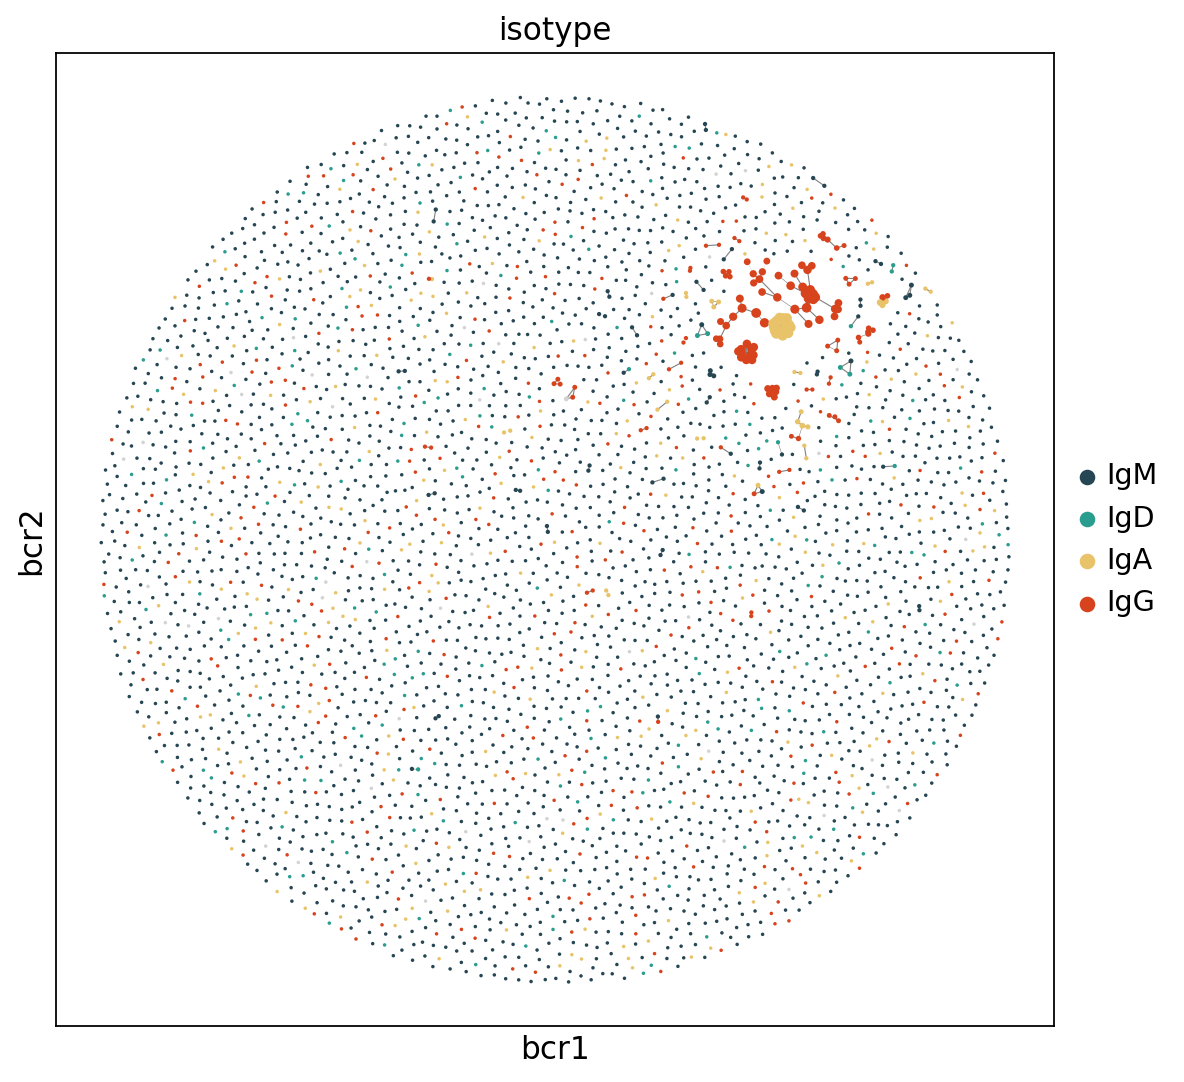

In [31]:
import numpy as np
sc.set_figure_params(figsize = [8,8], dpi_save = 900)
samp = 'Critical'
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].astype('category')
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].cat.reorder_categories(['IgM', 'IgD', 'IgA', 'IgG', 'unassigned', 'No_BCR'])
ddl.pl.clone_network(adata[samp], 
                     color = ['isotype'],
                     palette = [col_dict2[c] for c in adata[samp].obs['isotype'].cat.categories], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     groups = ['IgM', 'IgD', 'IgA', 'IgG'],
                     size = adata[samp].obs['clone_centrality']*20000+10,
                     save = '/'+samp+'_dandelion_v2.pdf')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'clone_id' as categorical
... storing 'lightchain' as categorical
... storing 'status' as categorical
... storing 'vdj_status' as categorical
... storing 'productive' as categorical
... storing 'umi_counts_light' as categorical
... storing 'v_call_heavy' as categorical
... storing 'v_call_light' as categorical
... storing 'j_call_heavy' as categorical
... storing 'j_call_light' as categorical
... storing 'c_call_heavy' as categorical
... storing 'c_call_light' as categorical
... storing 'mu_freq_light' as categorical


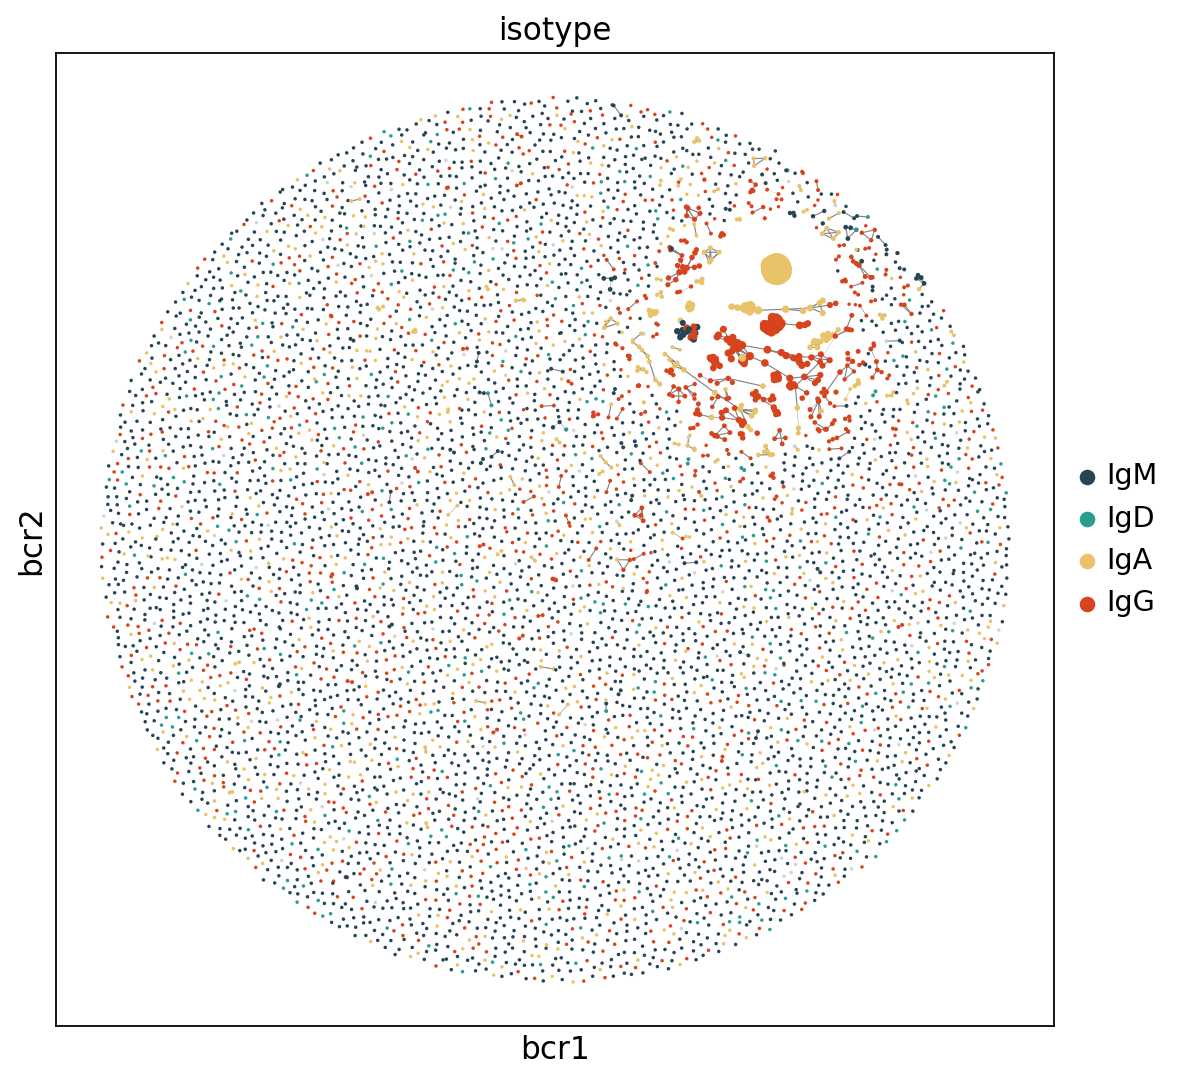

In [33]:
samp = 'Severe'
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].astype('category')
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].cat.reorder_categories(['IgM', 'IgD', 'IgA', 'IgG', 'unassigned', 'No_BCR'])
ddl.pl.clone_network(adata[samp], 
                     color = ['isotype'],
                     palette = [col_dict2[c] for c in adata[samp].obs['isotype'].cat.categories], 
                     groups = ['IgM', 'IgD', 'IgA', 'IgG'],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     size = adata[samp].obs['clone_centrality']*20000+10,
                     save = '/'+samp+'_dandelion_v2.pdf')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'clone_id' as categorical
... storing 'lightchain' as categorical
... storing 'status' as categorical
... storing 'vdj_status' as categorical
... storing 'productive' as categorical
... storing 'umi_counts_light' as categorical
... storing 'v_call_heavy' as categorical
... storing 'v_call_light' as categorical
... storing 'j_call_heavy' as categorical
... storing 'j_call_light' as categorical
... storing 'c_call_heavy' as categorical
... storing 'c_call_light' as categorical
... storing 'mu_freq_light' as categorical


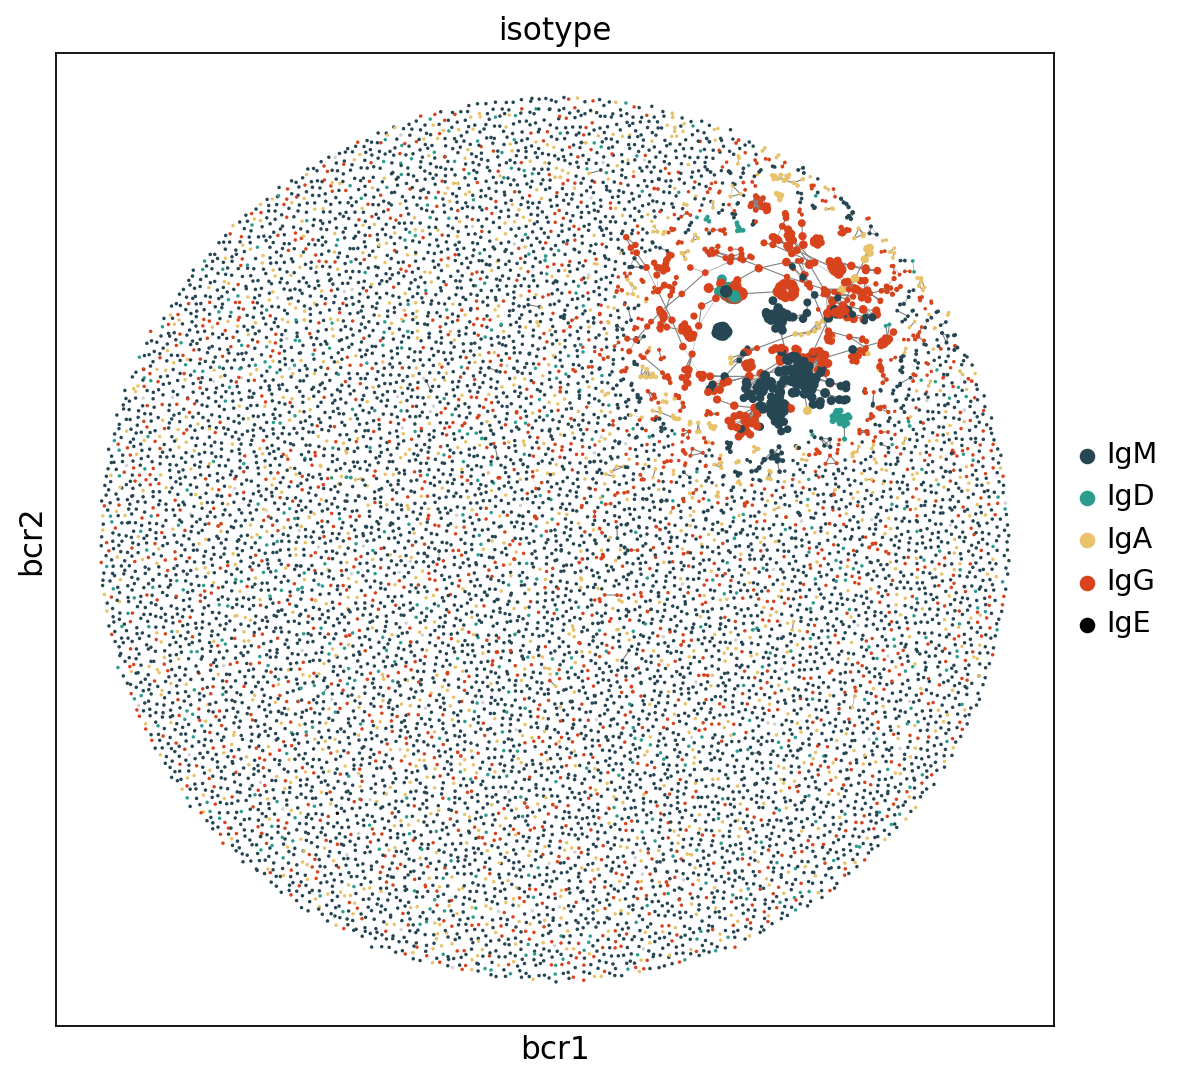

In [35]:
samp = 'Moderate'
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].astype('category')
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].cat.reorder_categories(['IgM', 'IgD', 'IgA', 'IgE', 'IgG', 'unassigned', 'No_BCR'])
ddl.pl.clone_network(adata[samp], 
                     color = ['isotype'],
                     palette = [col_dict2[c] for c in adata[samp].obs['isotype'].cat.categories], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     groups = ['IgM', 'IgD', 'IgA', 'IgG', 'IgE'],
                     size = adata[samp].obs['clone_centrality']*20000+10,
                     save = '/'+samp+'_dandelion_v2.pdf')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'clone_id' as categorical
... storing 'lightchain' as categorical
... storing 'status' as categorical
... storing 'vdj_status' as categorical
... storing 'productive' as categorical
... storing 'umi_counts_light' as categorical
... storing 'v_call_heavy' as categorical
... storing 'v_call_light' as categorical
... storing 'j_call_heavy' as categorical
... storing 'j_call_light' as categorical
... storing 'c_call_heavy' as categorical
... storing 'c_call_light' as categorical
... storing 'mu_freq_light' as categorical


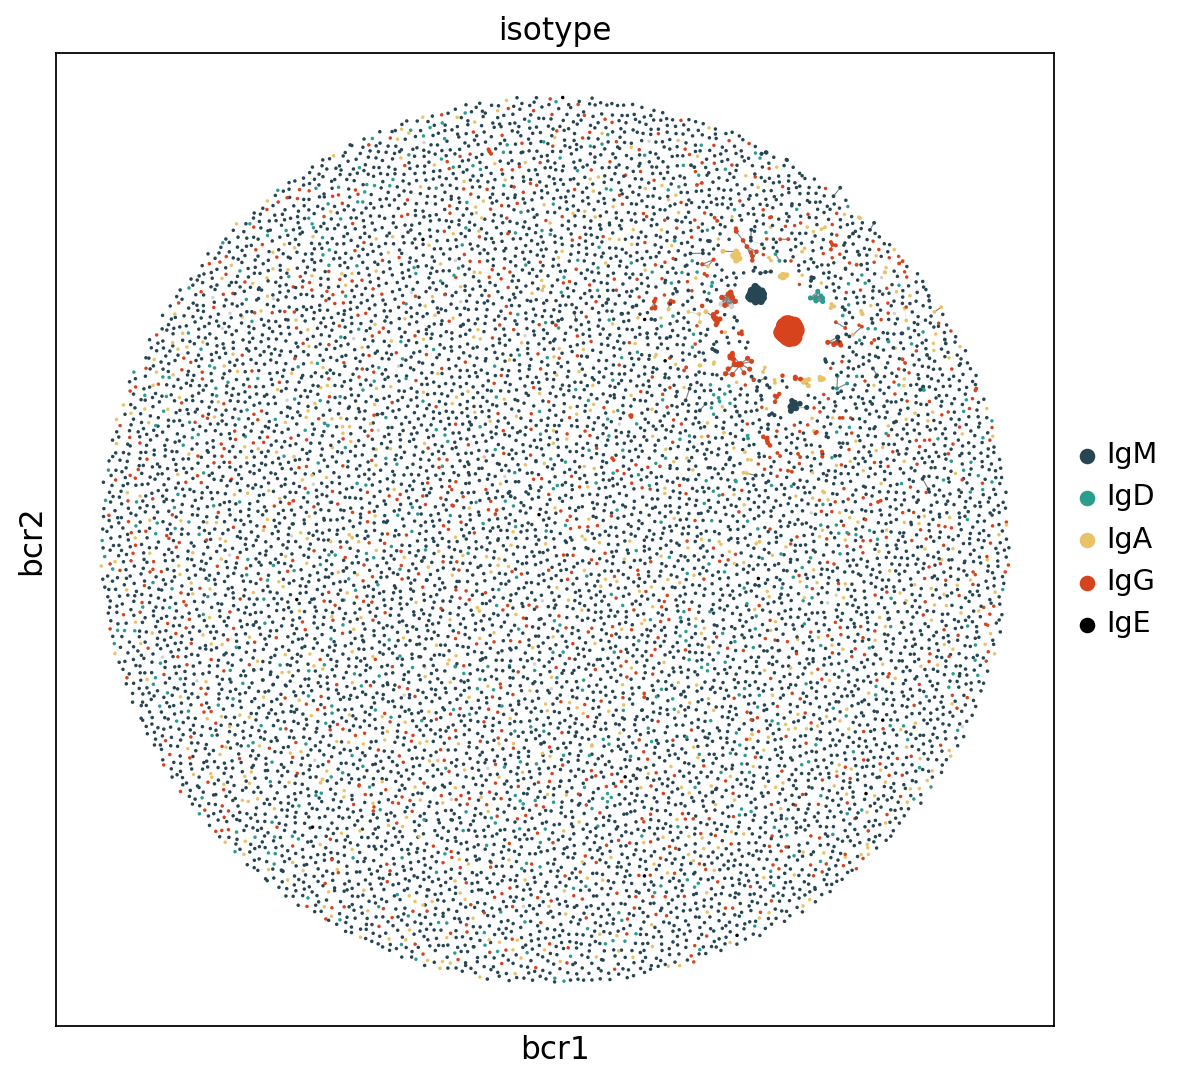

In [36]:
samp = 'Mild'
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].astype('category')
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].cat.reorder_categories(['IgM', 'IgD', 'IgA', 'IgE', 'IgG', 'unassigned', 'No_BCR'])
ddl.pl.clone_network(adata[samp], 
                     color = ['isotype'],
                     palette = [col_dict2[c] for c in adata[samp].obs['isotype'].cat.categories], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     groups = ['IgM', 'IgD', 'IgA', 'IgG', 'IgE'],
                     size = adata[samp].obs['clone_centrality']*20000+10,
                     save = '/'+samp+'_dandelion_v2.pdf')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'clone_id' as categorical
... storing 'lightchain' as categorical
... storing 'status' as categorical
... storing 'vdj_status' as categorical
... storing 'productive' as categorical
... storing 'umi_counts_light' as categorical
... storing 'v_call_heavy' as categorical
... storing 'v_call_light' as categorical
... storing 'j_call_heavy' as categorical
... storing 'j_call_light' as categorical
... storing 'c_call_heavy' as categorical
... storing 'c_call_light' as categorical
... storing 'mu_freq_light' as categorical


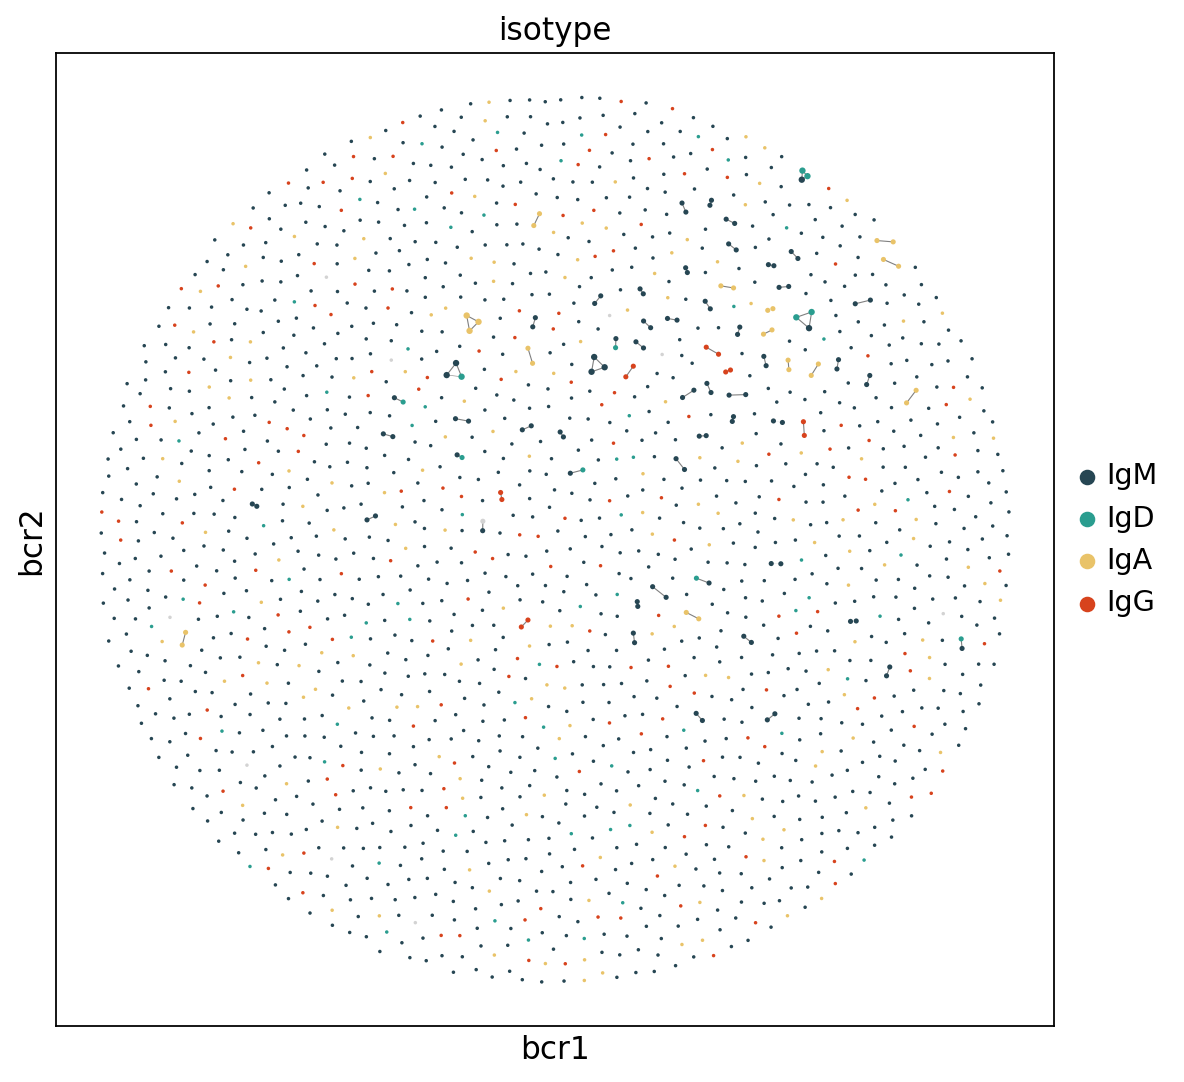

In [37]:
samp = 'Asymptomatic'
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].astype('category')
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].cat.reorder_categories(['IgM', 'IgD', 'IgA', 'IgG', 'unassigned', 'No_BCR'])
ddl.pl.clone_network(adata[samp], 
                     color = ['isotype'],
                     palette = [col_dict2[c] for c in adata[samp].obs['isotype'].cat.categories], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     groups = ['IgM', 'IgD', 'IgA', 'IgG'],
                     size = adata[samp].obs['clone_centrality']*20000+10,
                     save = '/'+samp+'_dandelion_v2.pdf')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'clone_id' as categorical
... storing 'lightchain' as categorical
... storing 'status' as categorical
... storing 'vdj_status' as categorical
... storing 'productive' as categorical
... storing 'umi_counts_light' as categorical
... storing 'v_call_heavy' as categorical
... storing 'v_call_light' as categorical
... storing 'j_call_heavy' as categorical
... storing 'j_call_light' as categorical
... storing 'c_call_heavy' as categorical
... storing 'c_call_light' as categorical
... storing 'mu_freq_light' as categorical


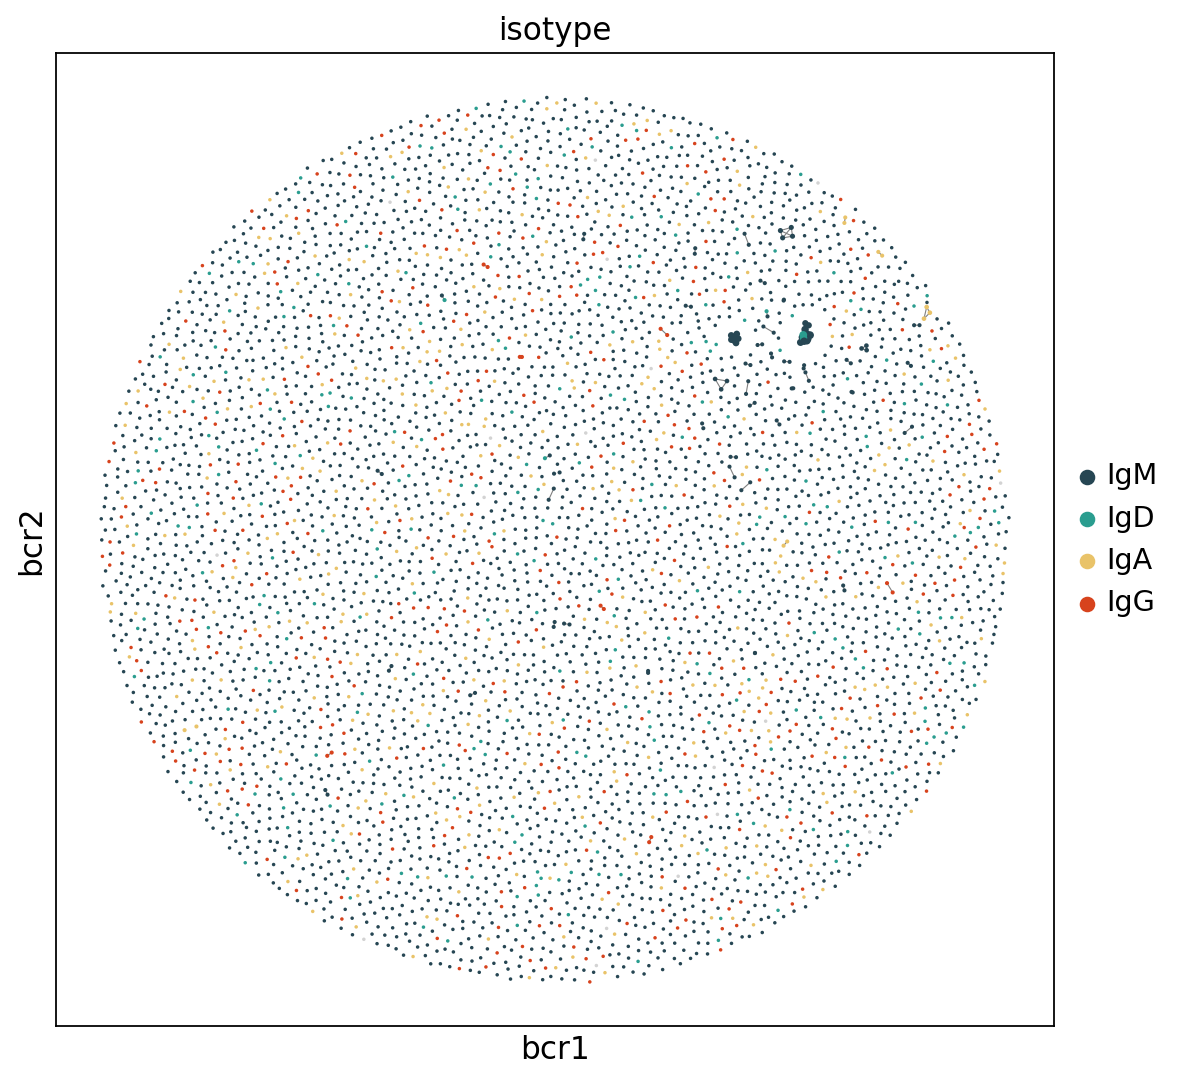

In [38]:
samp = 'Healthy'
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].astype('category')
adata[samp].obs['isotype'] = adata[samp].obs['isotype'].cat.reorder_categories(['IgM', 'IgD', 'IgA', 'IgG', 'unassigned', 'No_BCR'])
ddl.pl.clone_network(adata[samp], 
                     color = ['isotype'],
                     palette = [col_dict2[c] for c in adata[samp].obs['isotype'].cat.categories], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     groups = ['IgM', 'IgD', 'IgA', 'IgG'],
                     size = adata[samp].obs['clone_centrality']*20000+10,
                     save = '/'+samp+'_dandelion_v2.pdf')

In [13]:
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    ddl.tl.transfer(adata[x], vdj[x], expanded_only = True)

converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots


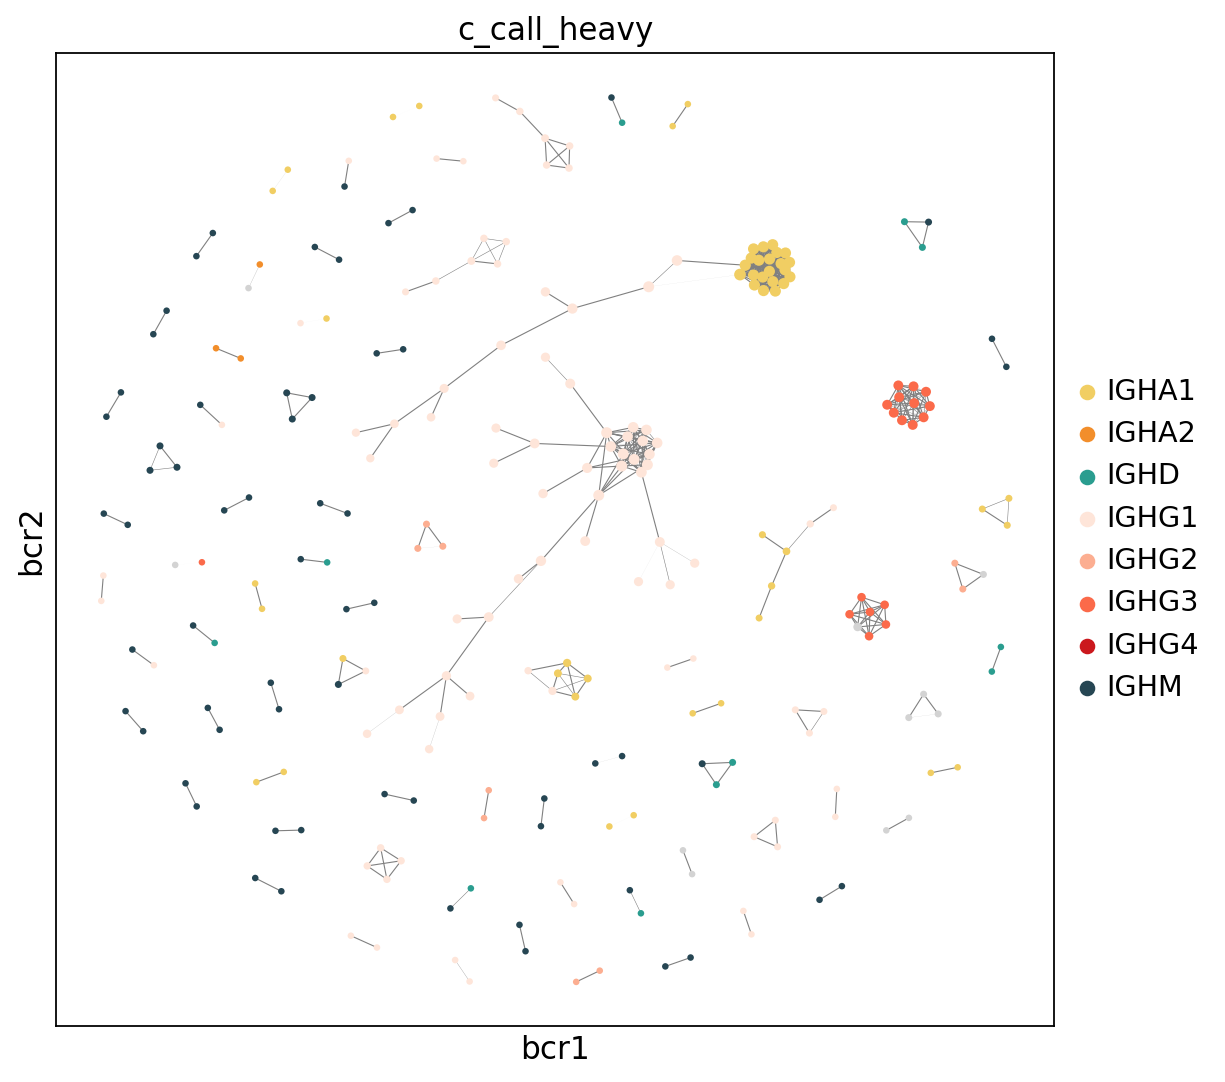

In [41]:
import numpy as np
sc.set_figure_params(figsize = [8,8], dpi_save = 900, vector_friendly = True)
samp = 'Critical'
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].astype('category')
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].cat.reorder_categories(sorted(list(set(adata[samp].obs['c_call_heavy']))))
ddl.pl.clone_network(adata[samp], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM'],
                     palette = [col_dict[c] for c in adata[samp].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     size = adata[samp].obs['clone_centrality']*20000+30,
                     save = '/expanded_'+samp+'_network_subclass_v2.pdf')

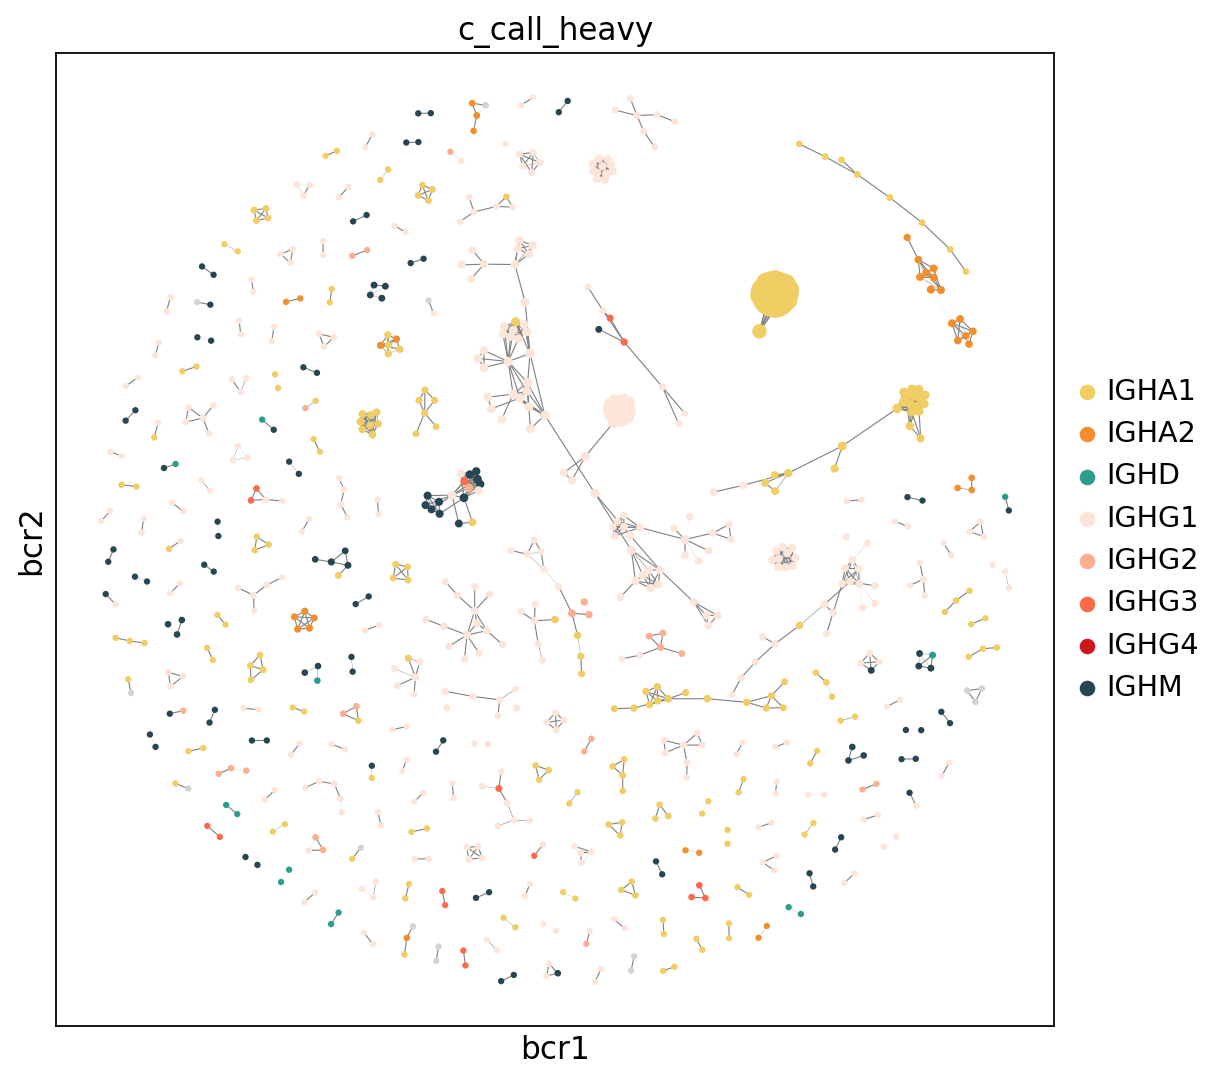

In [42]:
samp = 'Severe'
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].astype('category')
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].cat.reorder_categories(sorted(list(set(adata[samp].obs['c_call_heavy']))))
ddl.pl.clone_network(adata[samp], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM'],
                     palette = [col_dict[c] for c in adata[samp].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     size = adata[samp].obs['clone_centrality']*20000+30,
                     save = '/expanded_'+samp+'_network_subclass_v2.pdf')

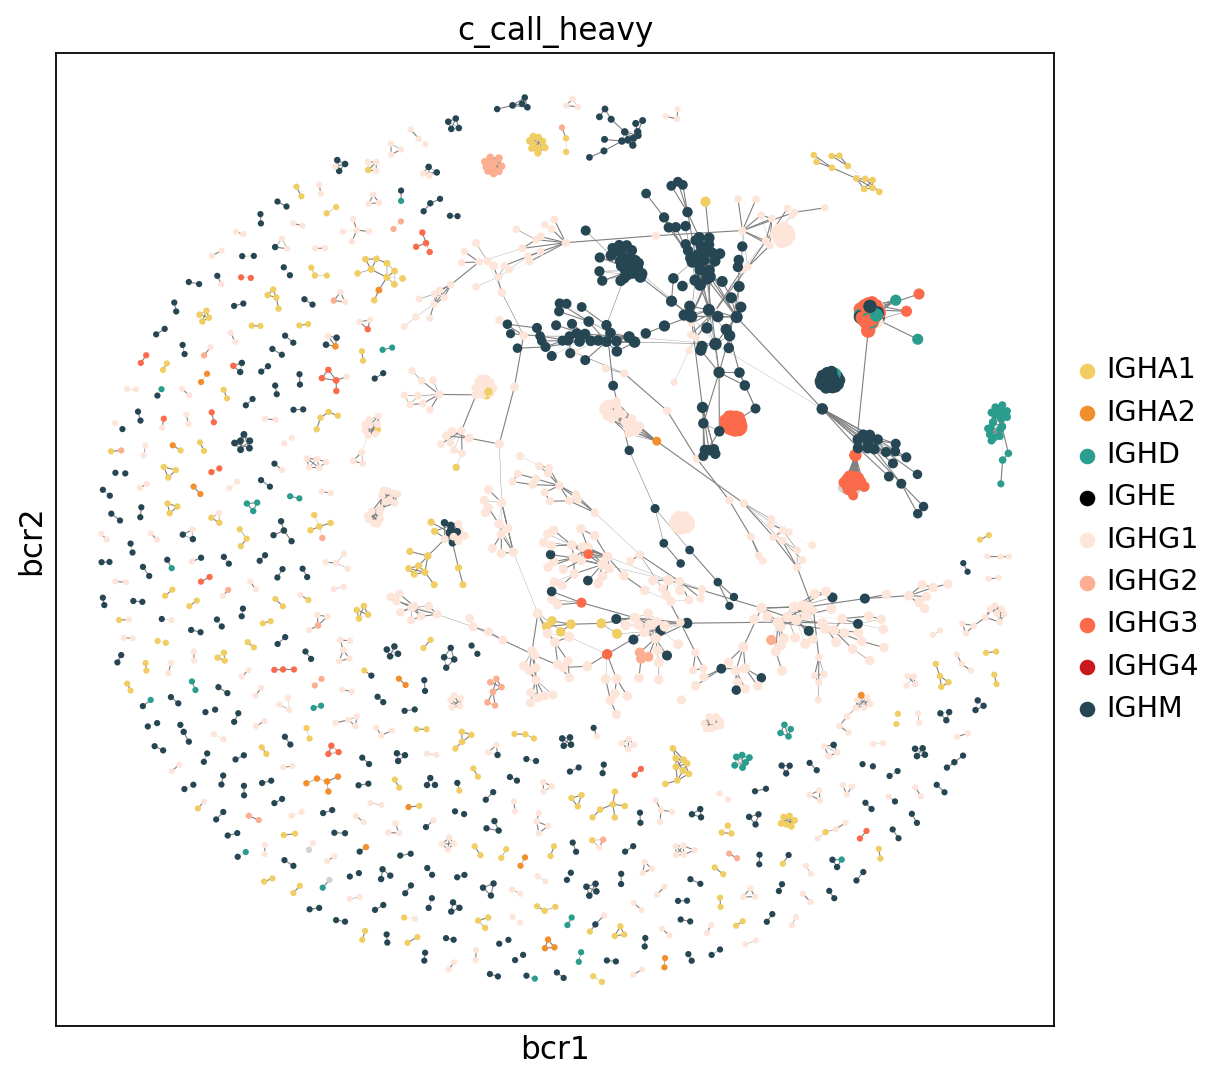

In [43]:
samp = 'Moderate'
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].astype('category')
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].cat.reorder_categories(sorted(list(set(adata[samp].obs['c_call_heavy']))))
ddl.pl.clone_network(adata[samp], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHE', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM'],
                     palette = [col_dict[c] for c in adata[samp].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     size = adata[samp].obs['clone_centrality']*20000+30,
                     save = '/expanded_'+samp+'_network_subclass_v2.pdf')

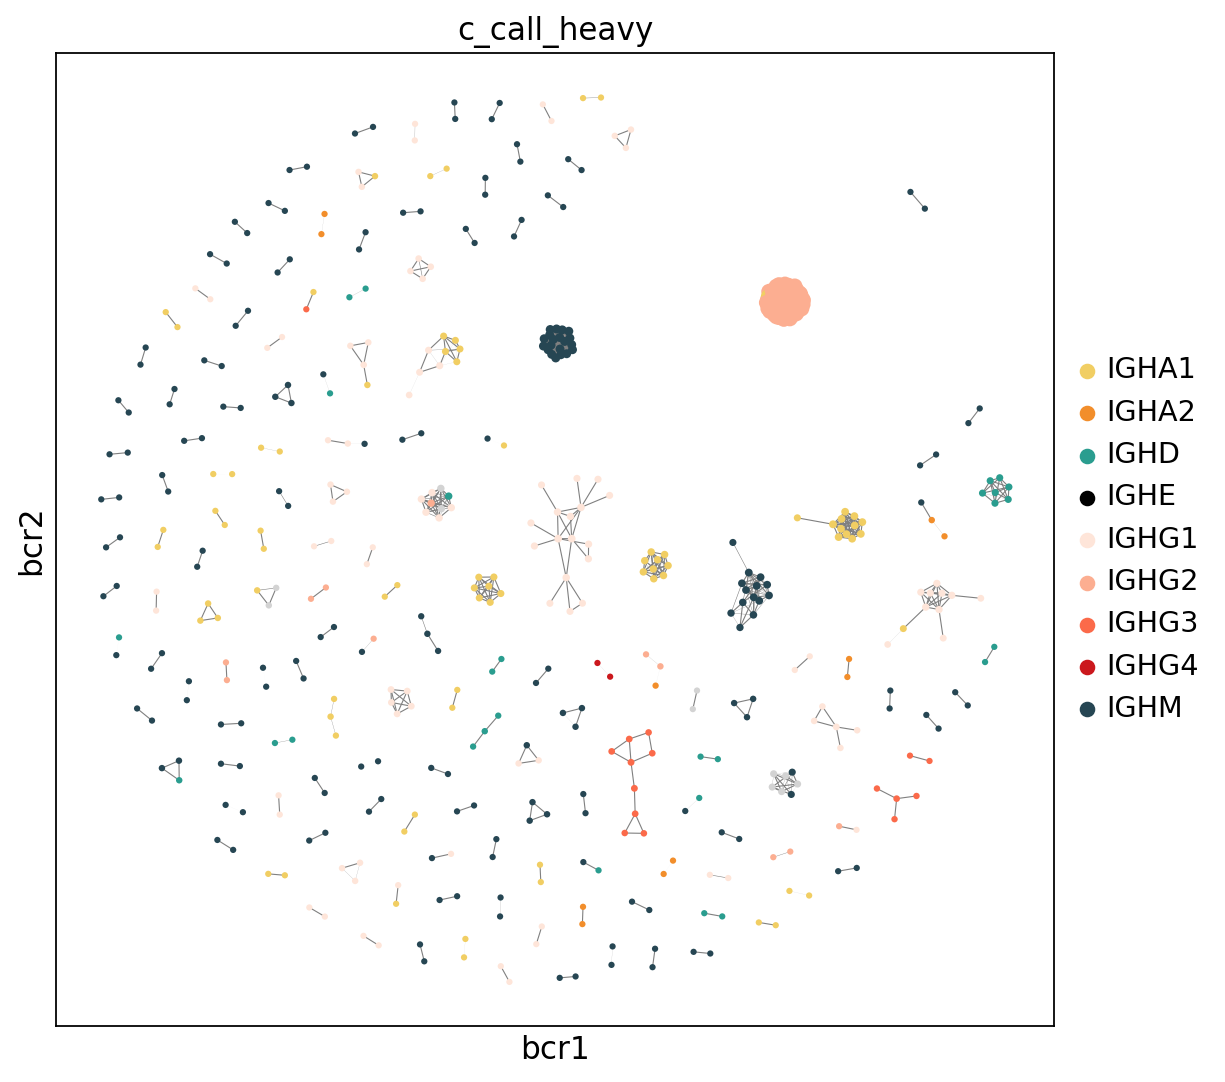

In [44]:
samp = 'Mild'
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].astype('category')
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].cat.reorder_categories(sorted(list(set(adata[samp].obs['c_call_heavy']))))
ddl.pl.clone_network(adata[samp], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHE', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM'],
                     palette = [col_dict[c] for c in adata[samp].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     size = adata[samp].obs['clone_centrality']*20000+30,
                     save = '/expanded_'+samp+'_network_subclass_v2.pdf')

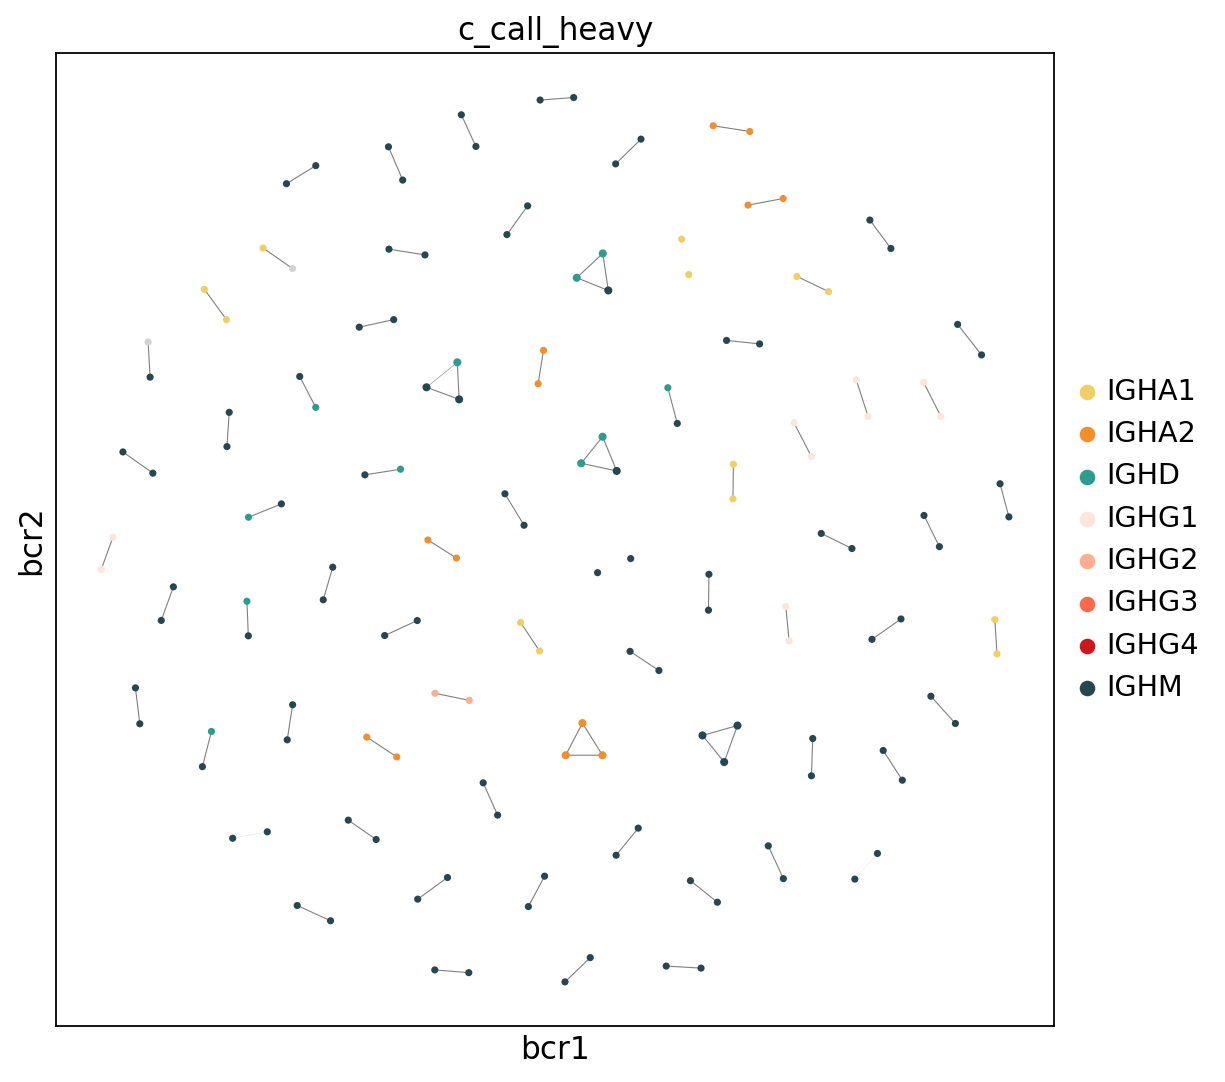

In [45]:
samp = 'Asymptomatic'
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].astype('category')
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].cat.reorder_categories(sorted(list(set(adata[samp].obs['c_call_heavy']))))
ddl.pl.clone_network(adata[samp], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM'],
                     palette = [col_dict[c] for c in adata[samp].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     size = adata[samp].obs['clone_centrality']*20000+30,
                     save = '/expanded_'+samp+'_network_subclass_v2.pdf')

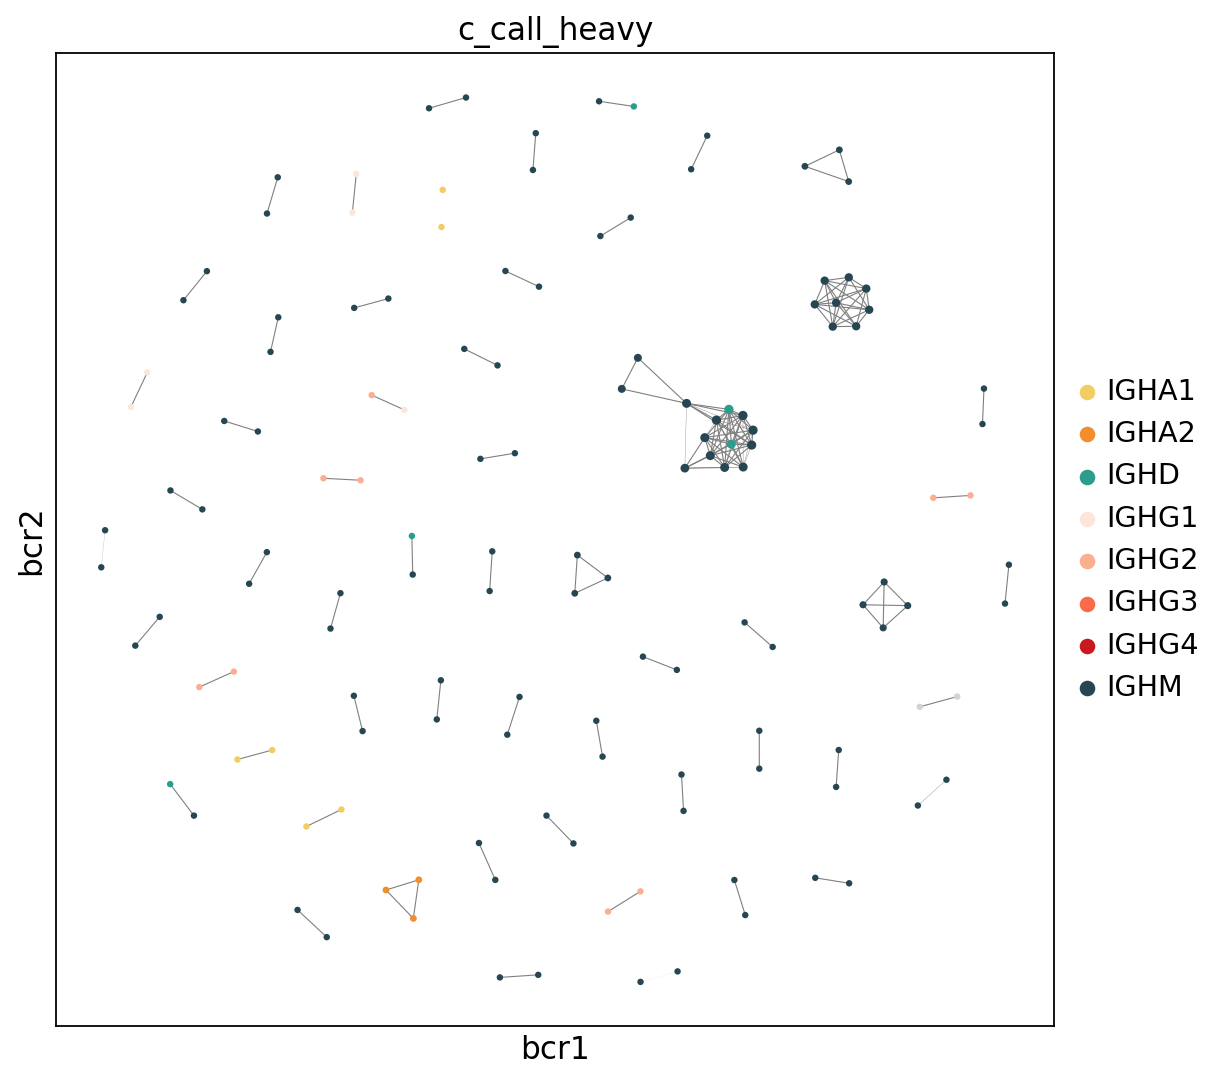

In [46]:
samp = 'Healthy'
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].astype('category')
adata[samp].obs['c_call_heavy'] = adata[samp].obs['c_call_heavy'].cat.reorder_categories(sorted(list(set(adata[samp].obs['c_call_heavy']))))
ddl.pl.clone_network(adata[samp], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM'],
                     palette = [col_dict[c] for c in adata[samp].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj[samp])],
                     size = adata[samp].obs['clone_centrality']*20000+30,
                     save = '/expanded_'+samp+'_network_subclass_v2.pdf')

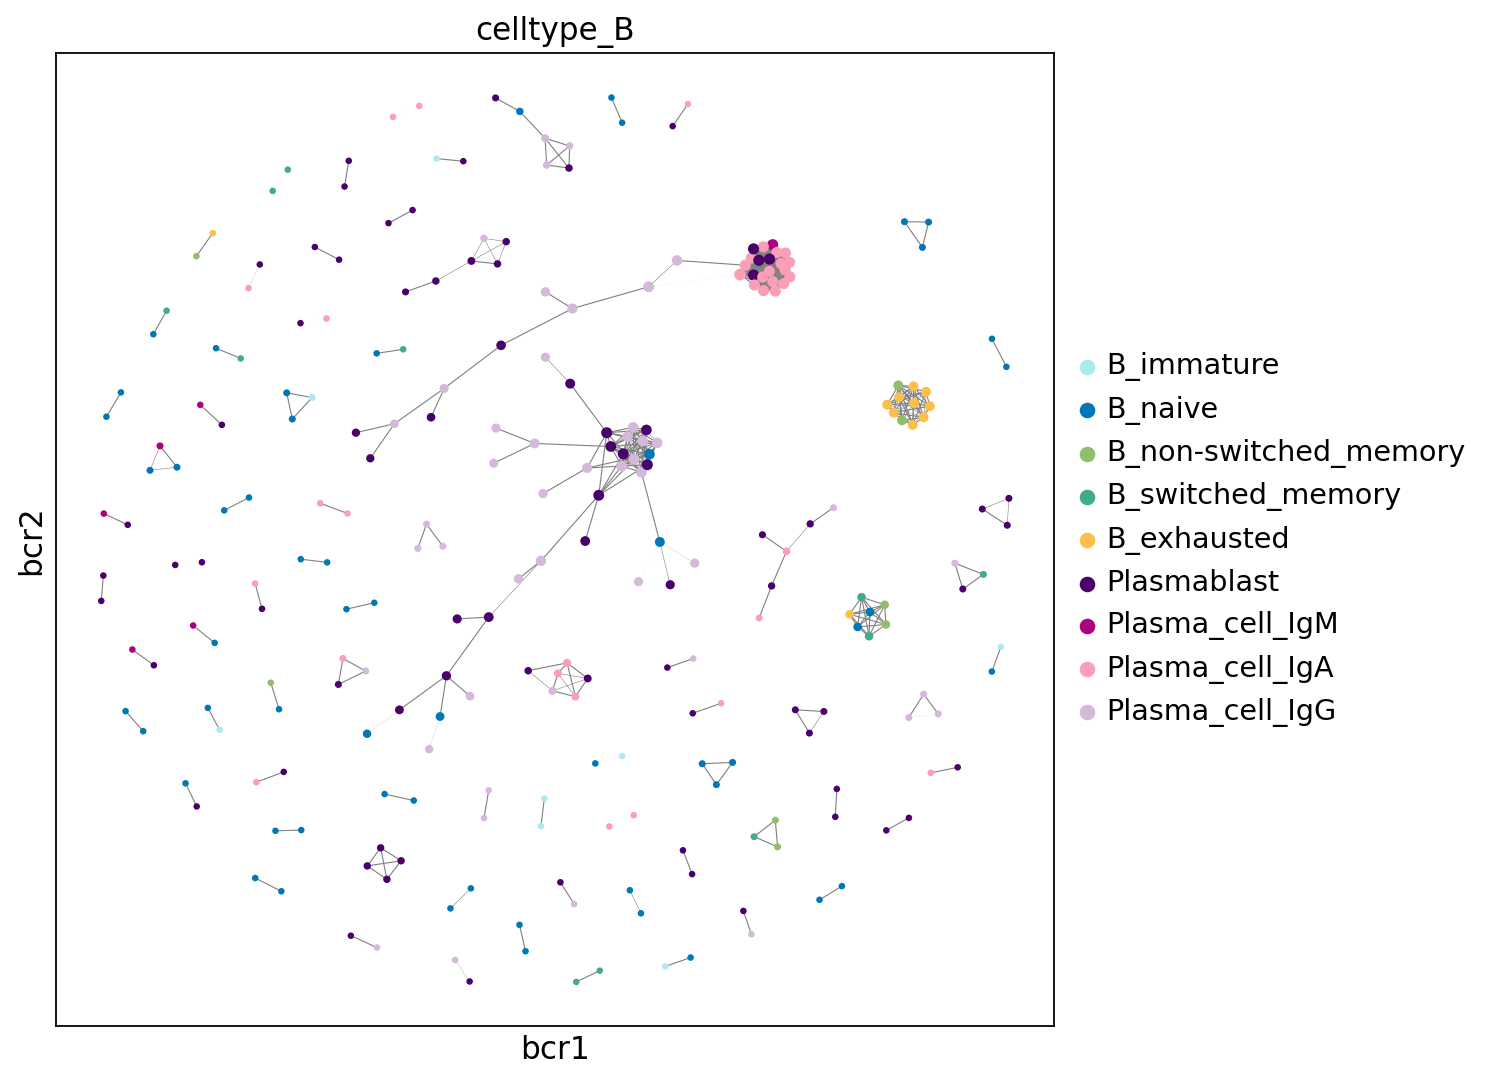

In [20]:
import numpy as np
sc.set_figure_params(figsize = [8,8], dpi_save = 900)
ddl.pl.clone_network(adata['Critical'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Critical'])],
                     size = adata['Critical'].obs['clone_centrality']*20000+30,
                     save = '/expanded_critical_network_celltype_v2.pdf')

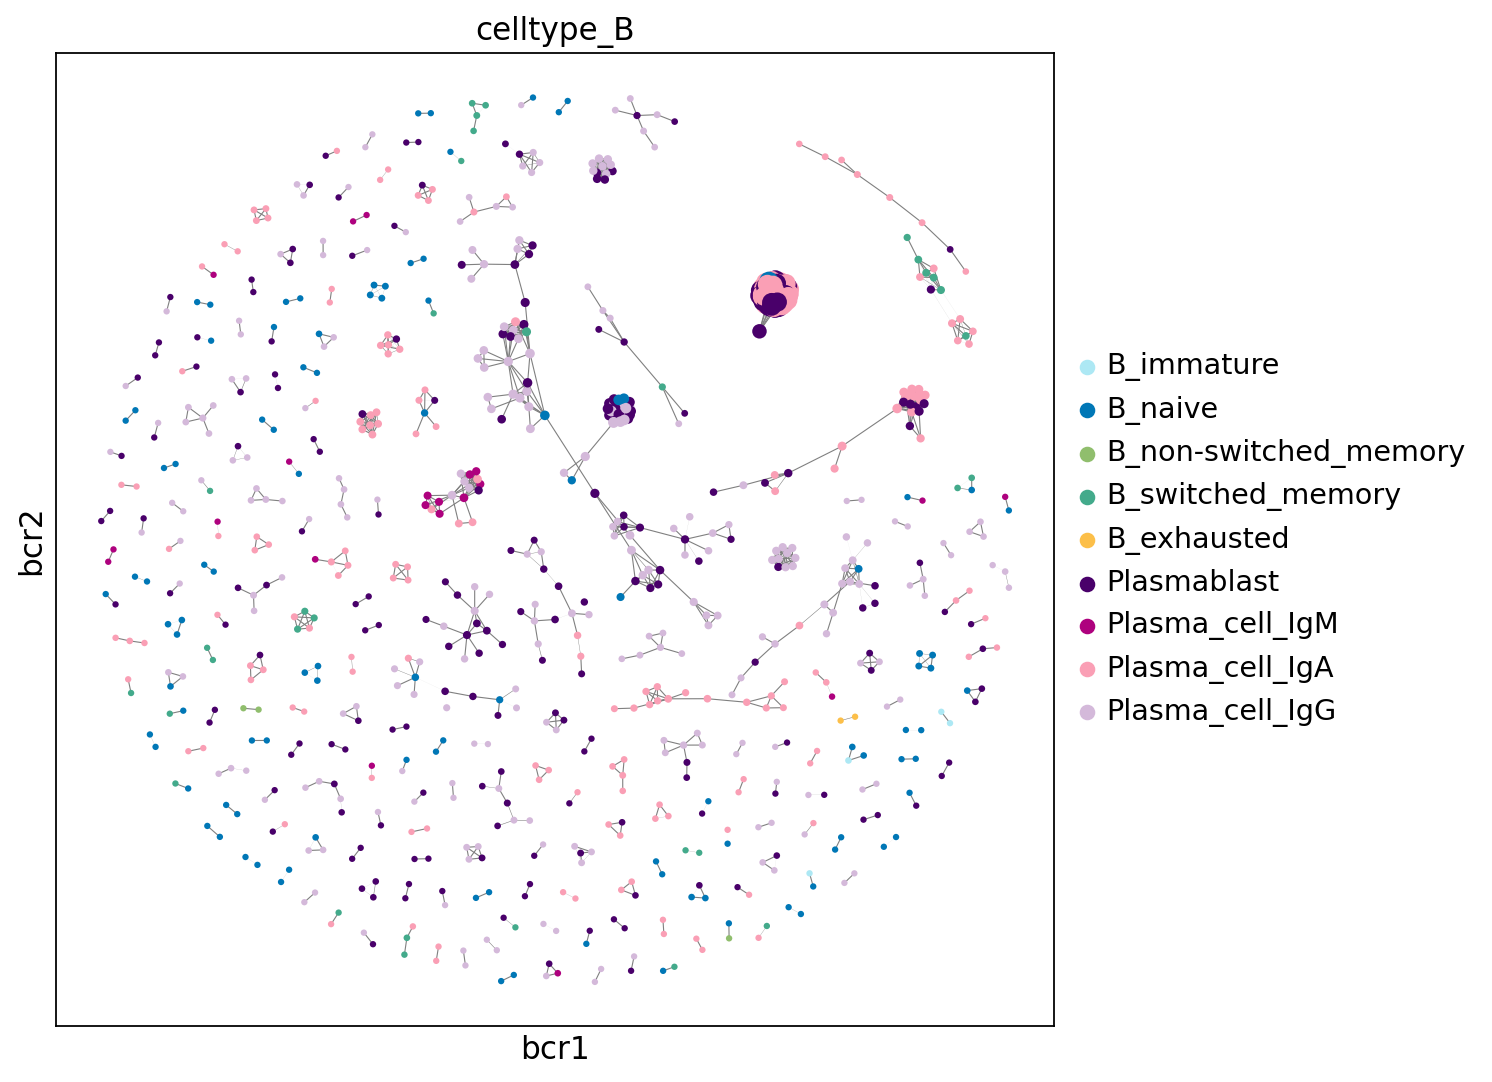

In [21]:
ddl.pl.clone_network(adata['Severe'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Severe'])],
                     size = adata['Severe'].obs['clone_centrality']*20000+30,
                     save = '/expanded_severe_network_celltype_v2.pdf')

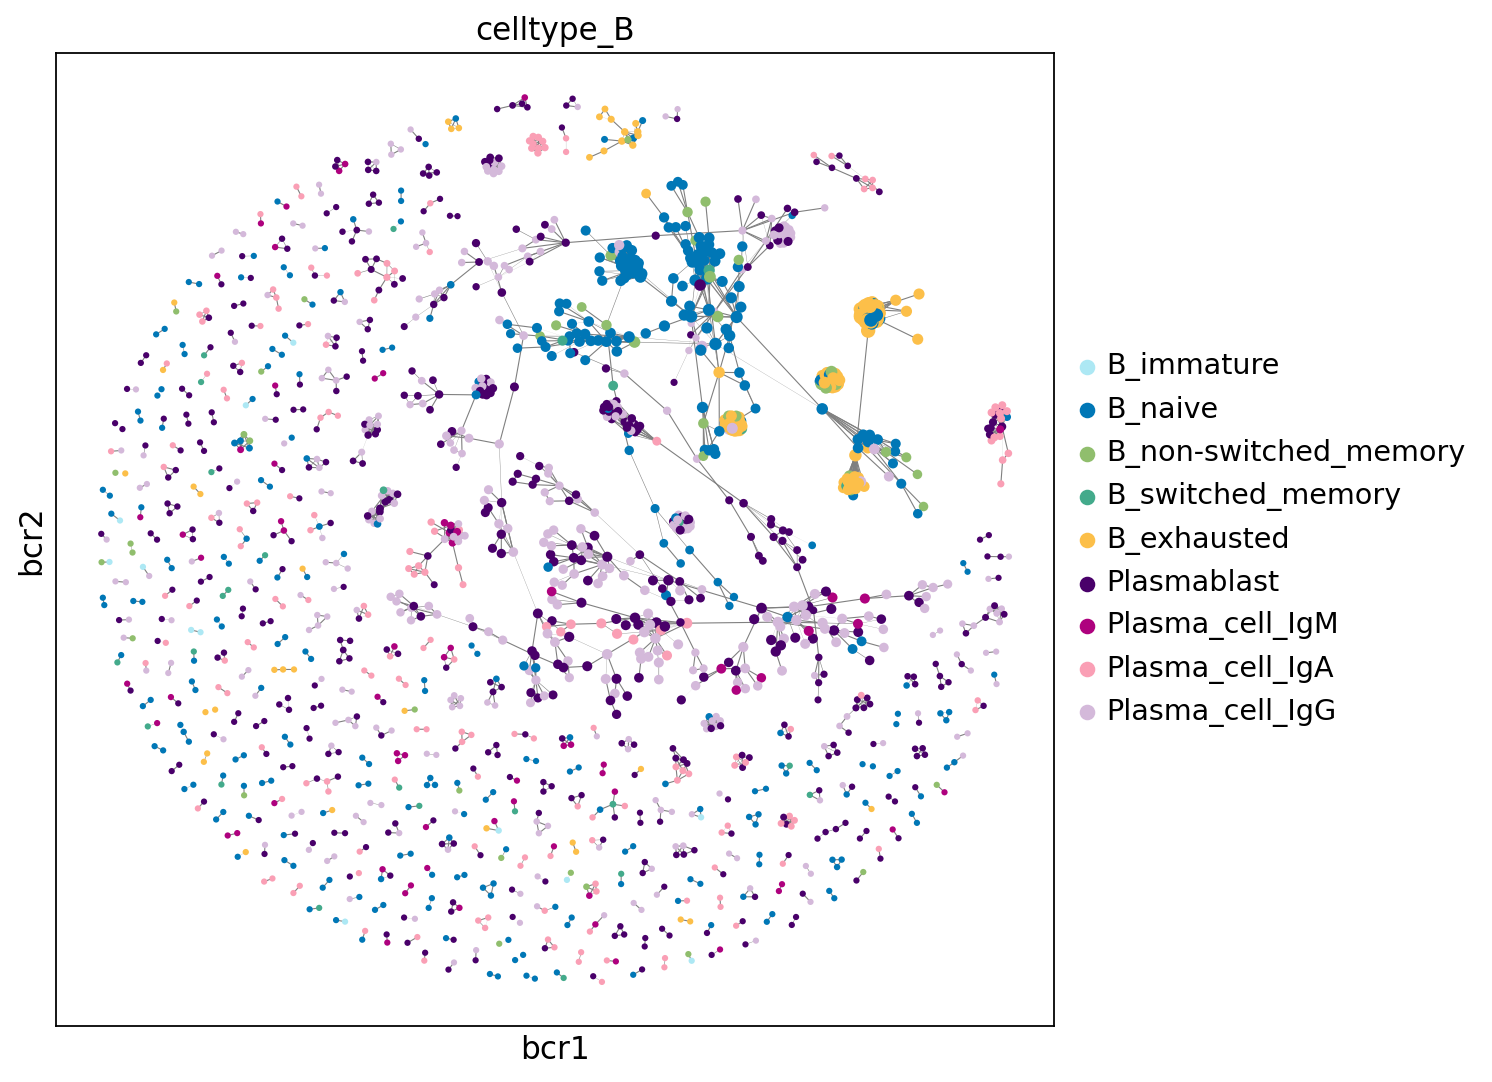

In [22]:
ddl.pl.clone_network(adata['Moderate'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Moderate'])],
                     size = adata['Moderate'].obs['clone_centrality']*20000+30,
                     save = '/expanded_moderate_network_celltype_v2.pdf')

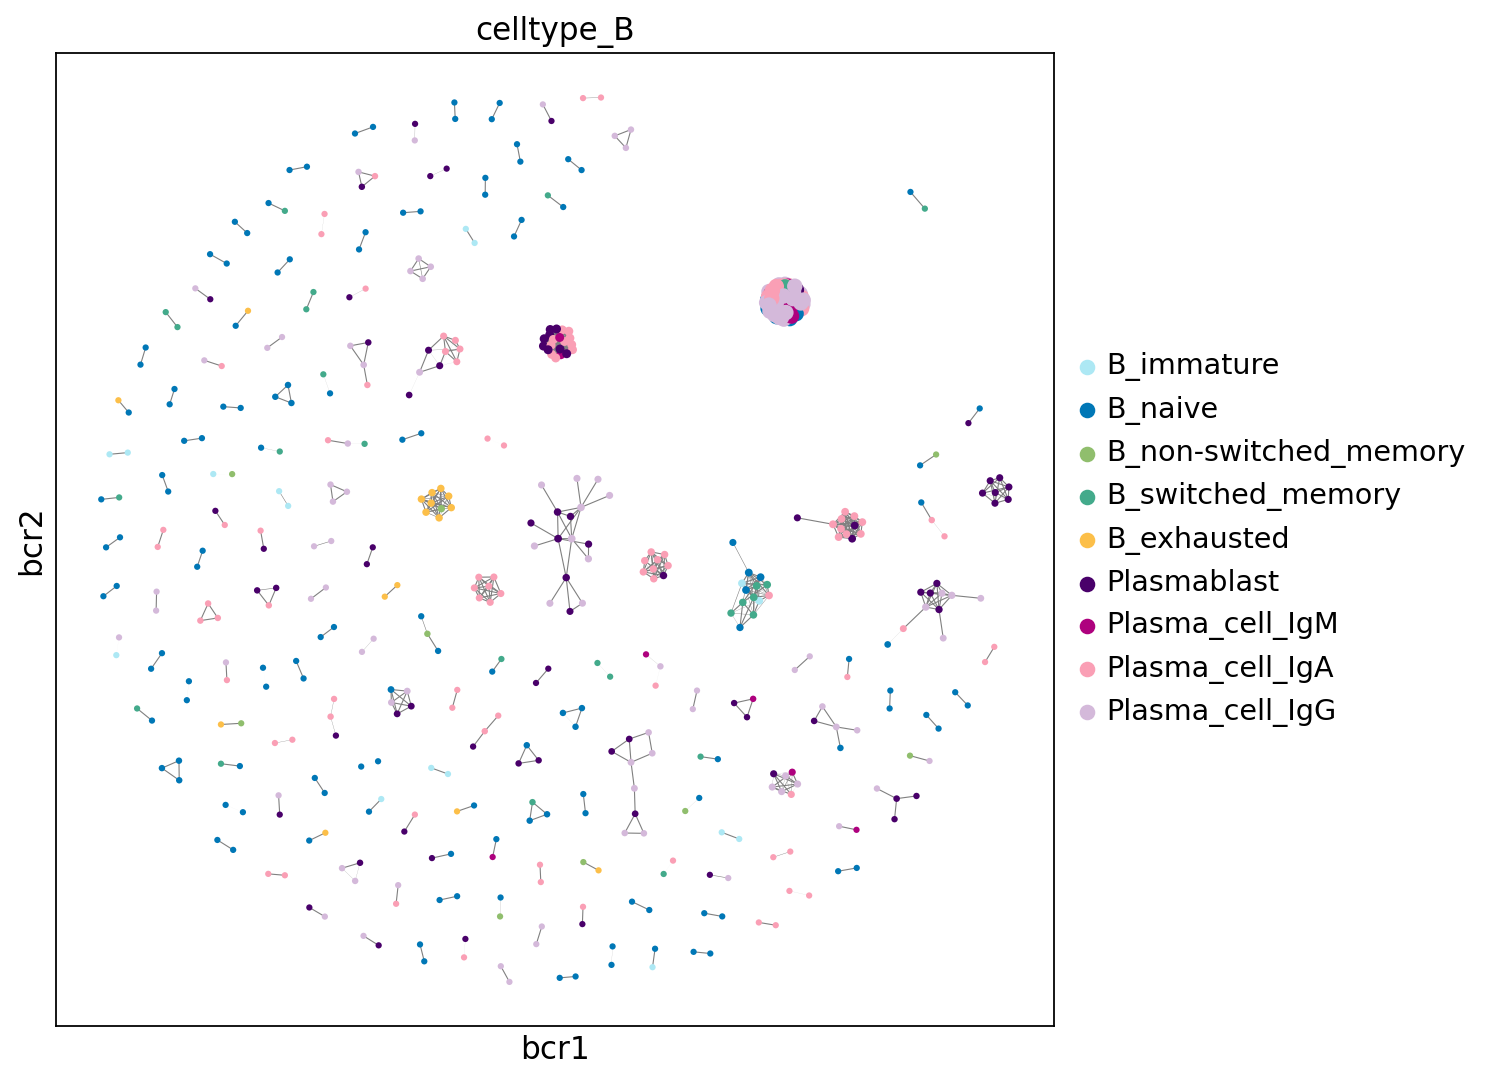

In [23]:
ddl.pl.clone_network(adata['Mild'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Mild'])],
                     size = adata['Mild'].obs['clone_centrality']*20000+30,
                     save = '/expanded_mild_network_celltype_v2.pdf')

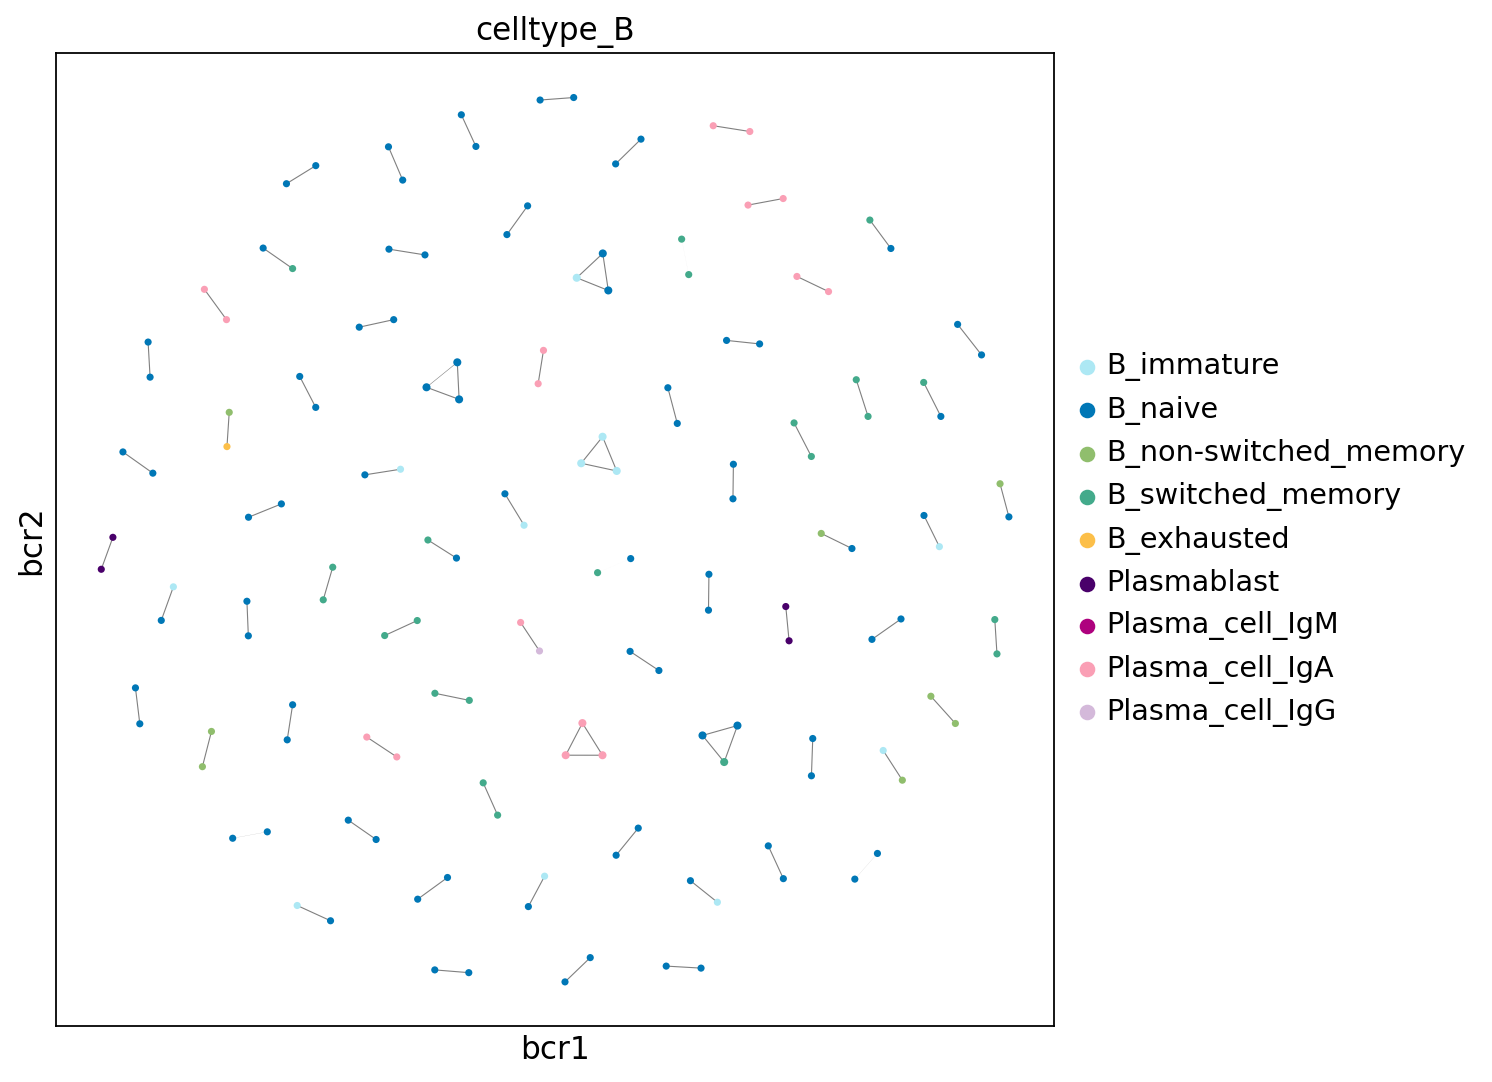

In [24]:
ddl.pl.clone_network(adata['Asymptomatic'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Asymptomatic'])],
                     size = adata['Asymptomatic'].obs['clone_centrality']*20000+30,
                     save = '/expanded_asymptomatic_network_celltype_v2.pdf')

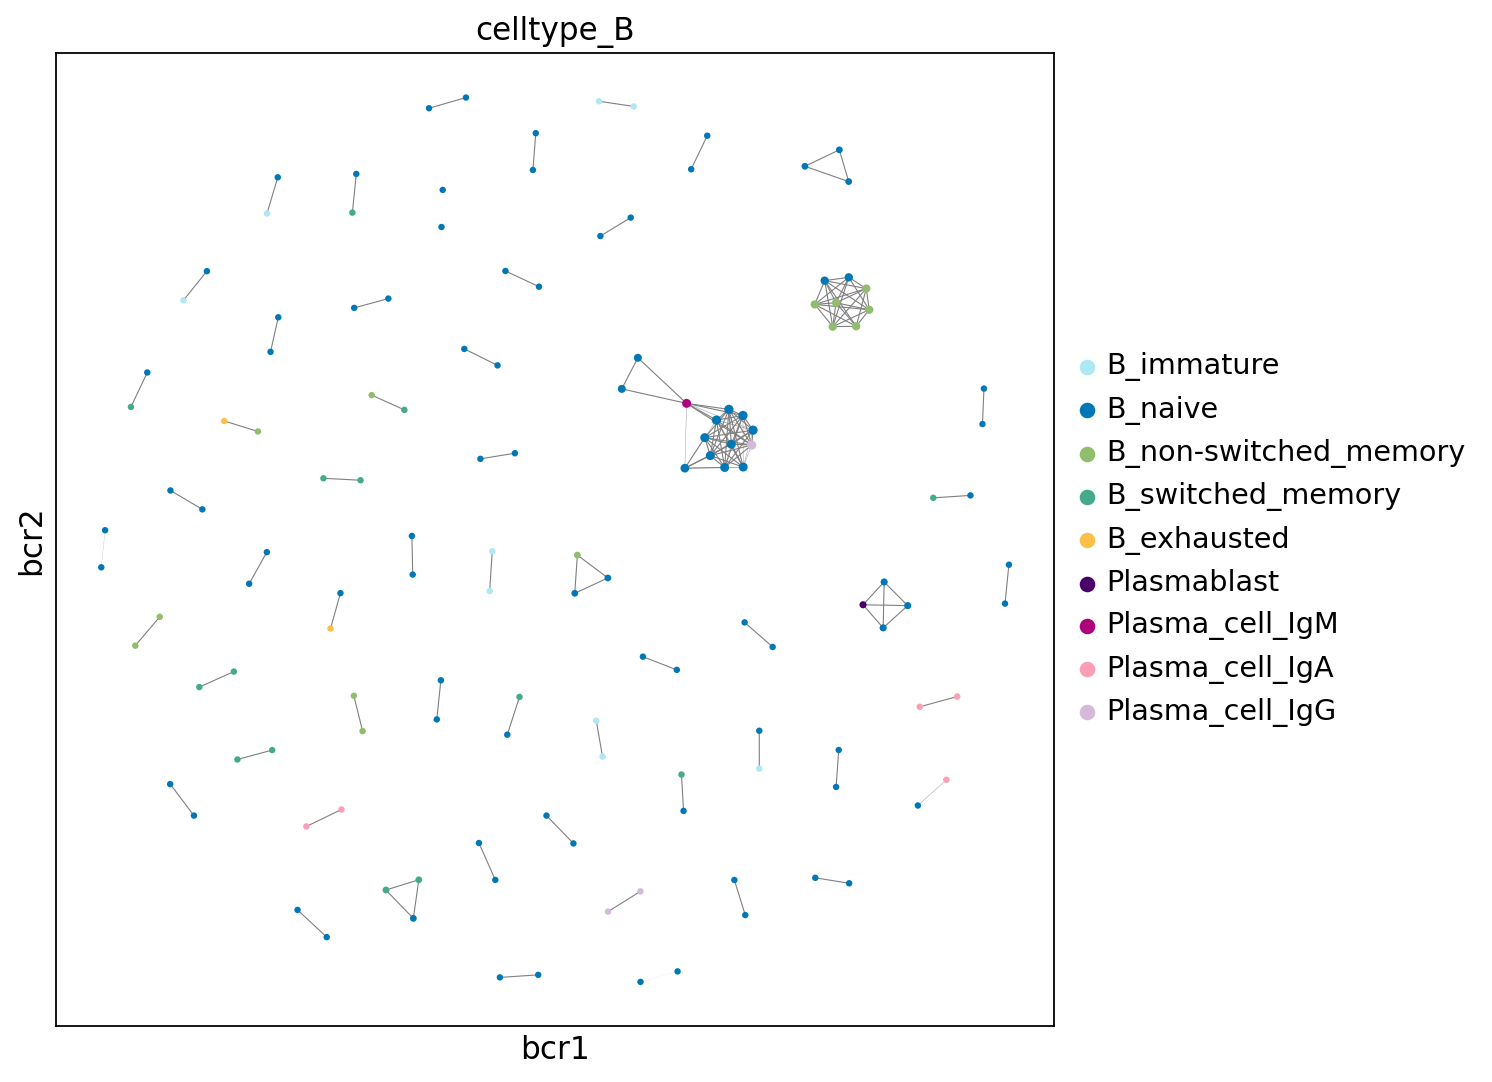

In [25]:
ddl.pl.clone_network(adata['Healthy'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Healthy'])],
                     size = adata['Healthy'].obs['clone_centrality']*20000+30,
                     save = '/expanded_healthy_network_celltype_v2.pdf')